# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
from splinter import Browser

browser = Browser('chrome')
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [8]:
from selenium.common.exceptions import SessionNotCreatedException, WebDriverException
from bs4 import BeautifulSoup
import time

try:
    if not driver.find_element("tag name", "html"):
        raise Exception("Browser session not valid")
except (AttributeError, SessionNotCreatedException, WebDriverException, Exception):
    from selenium import webdriver
    from selenium.webdriver.chrome.service import Service
    from webdriver_manager.chrome import ChromeDriverManager

    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service)
    driver.get(url)

# Create soup object
html = driver.page_source
mars_soup = BeautifulSoup(html, 'html.parser')
mars_soup


<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [9]:
# Extract all rows of data
from bs4 import BeautifulSoup

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
# Locate the table (optional: use id or class if available)
table = soup.find('table')  # or soup.find('table', class_='your-table-class')

# Get all rows
rows = table.find_all('tr')

# Loop through rows and extract cells
table_data = []

for row in rows:
    cells = row.find_all(['td', 'th'])  # include headers too
    cell_values = [cell.get_text(strip=True) for cell in cells]
    table_data.append(cell_values)

# Print result
from pprint import pprint
pprint(table_data)


[['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165'

In [10]:
import pandas as pd

# Convert list of lists into DataFrame
df = pd.DataFrame(table_data[1:], columns=table_data[0]) 
# Preview
print(df.head())


   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [11]:
# Get the header from the first row
headers = table_data[0]

# Create an empty list for dictionaries
data_dicts = []

# Loop through each data row and build a dictionary
for row in table_data[1:]:
    row_dict = dict(zip(headers, row))
    data_dicts.append(row_dict)

# Confirm the structure
from pprint import pprint
pprint(data_dicts)



[{'id': '2',
  'ls': '155',
  'min_temp': '-75.0',
  'month': '6',
  'pressure': '739.0',
  'sol': '10',
  'terrestrial_date': '2012-08-16'},
 {'id': '13',
  'ls': '156',
  'min_temp': '-76.0',
  'month': '6',
  'pressure': '740.0',
  'sol': '11',
  'terrestrial_date': '2012-08-17'},
 {'id': '24',
  'ls': '156',
  'min_temp': '-76.0',
  'month': '6',
  'pressure': '741.0',
  'sol': '12',
  'terrestrial_date': '2012-08-18'},
 {'id': '35',
  'ls': '157',
  'min_temp': '-74.0',
  'month': '6',
  'pressure': '732.0',
  'sol': '13',
  'terrestrial_date': '2012-08-19'},
 {'id': '46',
  'ls': '157',
  'min_temp': '-74.0',
  'month': '6',
  'pressure': '740.0',
  'sol': '14',
  'terrestrial_date': '2012-08-20'},
 {'id': '57',
  'ls': '158',
  'min_temp': '-78.0',
  'month': '6',
  'pressure': '740.0',
  'sol': '15',
  'terrestrial_date': '2012-08-21'},
 {'id': '68',
  'ls': '158',
  'min_temp': '-77.0',
  'month': '6',
  'pressure': '740.0',
  'sol': '16',
  'terrestrial_date': '2012-08-22'},


In [12]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
import pandas as pd

# Extract header and data rows
columns = table_data[0]
rows = table_data[1:]

# Create the DataFrame
df = pd.DataFrame(rows, columns=columns)

# Preview the DataFrame
print(df.head())


   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [13]:
# Examine data type of each column
df.dtypes


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [14]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'], errors='coerce')
df['sol'] = df['sol'].astype('int32')
df['ls'] = df['ls'].astype('int32')
df['month'] = df['month'].astype('int32')
df['min_temp'] = df['min_temp'].astype('float64')
df['pressure'] = df['pressure'].astype('float64')


In [15]:
# Confirm type changes were successful by examining data types again
df.dtypes


id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [16]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print(f"There are {num_months} unique months on Mars.")


There are 12 unique months on Mars.


In [17]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = df['sol'].nunique()
print(f"There are {num_sols} unique Martian sols in the dataset.")


There are 1867 unique Martian sols in the dataset.


In [18]:
# 3. What is the average minimum temperature by month?
monthly_temps = df.groupby('month')['min_temp'].mean().sort_values()
print(monthly_temps)


month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64


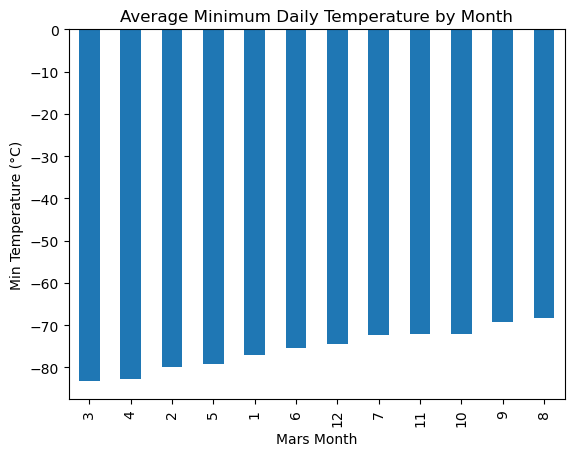

In [19]:
# Plot the average minimum temperature by month
import matplotlib.pyplot as plt

monthly_temps.plot(kind='bar', title='Average Minimum Daily Temperature by Month')
plt.ylabel("Min Temperature (°C)")
plt.xlabel("Mars Month")
plt.show()


month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64


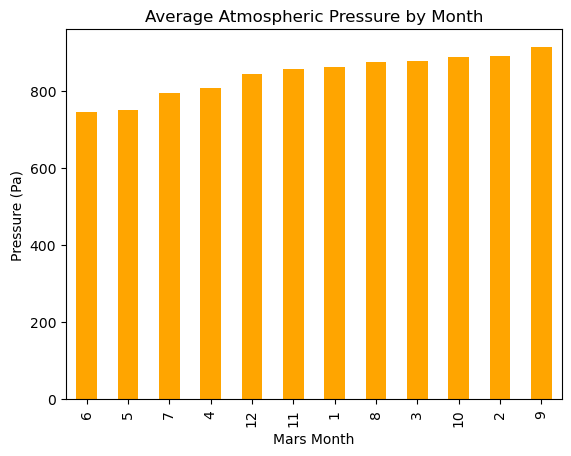

In [20]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
monthly_pressure = df.groupby('month')['pressure'].mean().sort_values()
print(monthly_pressure)
monthly_pressure.plot(kind='bar', title='Average Atmospheric Pressure by Month', color='orange')
plt.ylabel("Pressure (Pa)")
plt.xlabel("Mars Month")
plt.show()


In [21]:
# 4. What is the average pressure by month?
# Group by month and calculate the average pressure
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Display the result
print(avg_pressure_by_month)


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


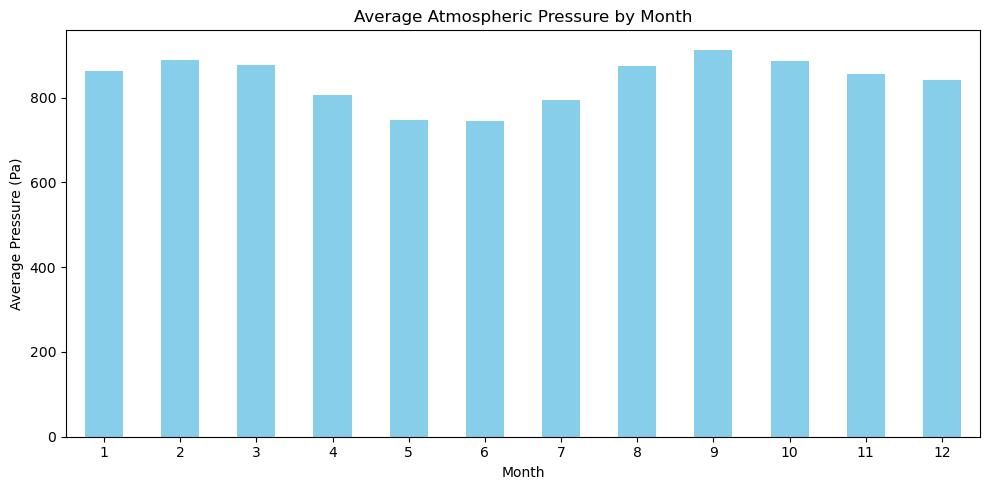

In [22]:
# Plot the average pressure by month
import matplotlib.pyplot as plt

# Group and average
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Plot the result
avg_pressure_by_month.plot(kind='bar', color='skyblue', figsize=(10,5), title='Average Atmospheric Pressure by Month')

# Label axes
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


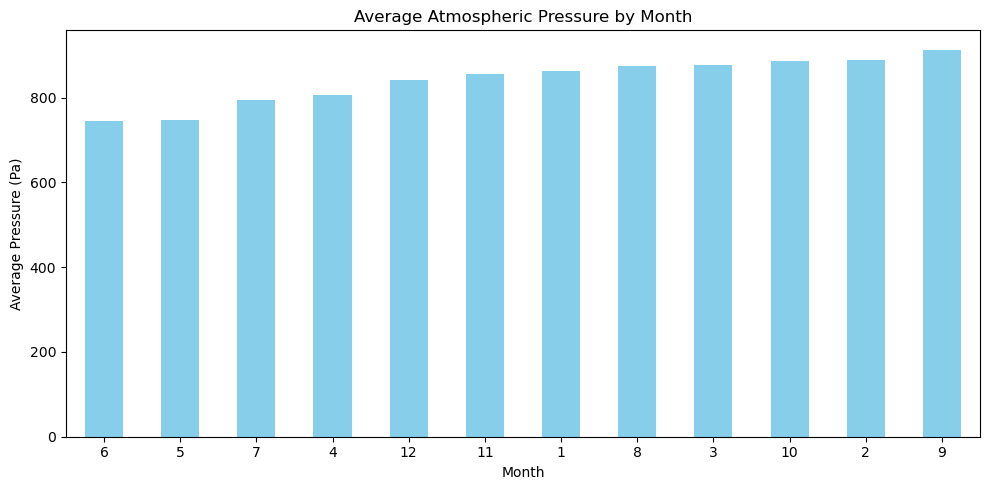

In [25]:
import matplotlib.pyplot as plt

# Group and sort average pressure by month
avg_pressure_by_month = df.groupby('month')['pressure'].mean().sort_values()

# Plot with uniform color
avg_pressure_by_month.plot(kind='bar', color='skyblue', figsize=(10,5), title='Average Atmospheric Pressure by Month')

# Labels and layout
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


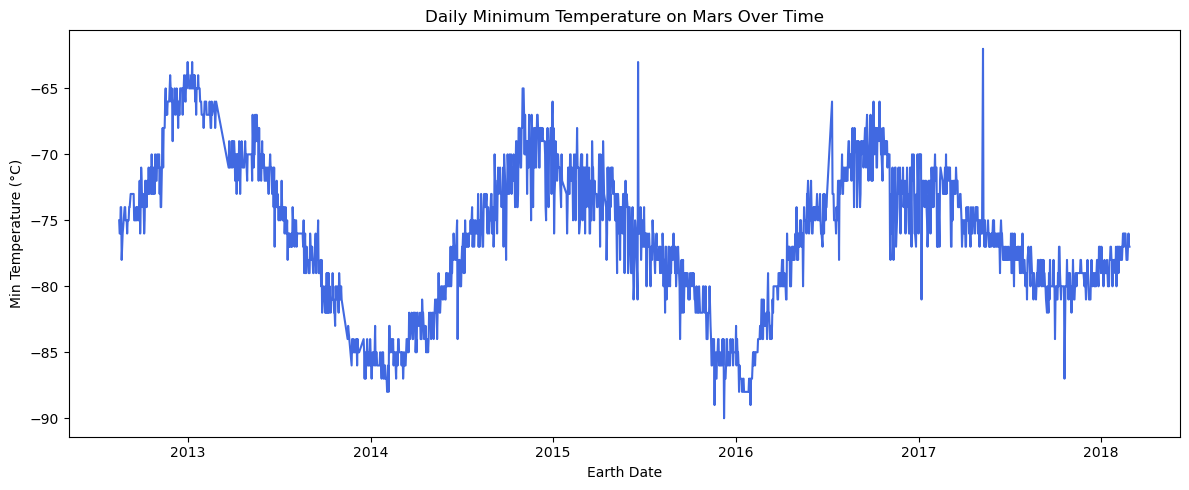

In [26]:
import matplotlib.pyplot as plt

# Ensure the date column is datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'], errors='coerce')

# Sort by date just in case
df = df.sort_values('terrestrial_date')

# Plot daily min temperature over time
plt.figure(figsize=(12,5))
plt.plot(df['terrestrial_date'], df['min_temp'], color='royalblue')
plt.title("Daily Minimum Temperature on Mars Over Time")
plt.xlabel("Earth Date")
plt.ylabel("Min Temperature (°C)")
plt.tight_layout()
plt.show()


Mars experiences considerable variations in minimum temperatures throughout a Mars year. It takes Mars 687 Earth days to orbit around the sun. The different variations reflect its varying seasonal patterns. Arranging the dataset by month and computing the average minimum daily temperatures suggests that some months consistently record lower temperatures. For instance, temperatures frequently fall below -80°C during the coldest periods, while the milder months are closer to -70°C. A bar chart depicting these monthly averages illustrates that the coldest times usually occur in the middle of the year. At the same time, the warmer months take place at the beginning and end of the Martian calendar.

In addition, atmospheric pressure on Mars shows monthly changes, although they are less pronounced than the fluctuations in temperature. The analysis indicates that average pressure varies between approximately 729 and 750 Pascals. Significantly, Month 5 often reports the lowest average atmospheric pressure, while Month 9 records the highest. These observations highlight the variable nature of Mars' thin atmosphere. The data, represented in an uncluttered bar chart format, enables simple month-to-month comparisons without visual distractions.

The minimum daily temperatures were plotted against Earth dates from the dataset to determine a Martian year in Earth days. Each complete cycle of temperature rises and falls corresponds to one Martian year. A visual inspection of the graph suggests that a complete cycle lasts around 670 to 690 Earth days, which closely aligns with the established length of a Martian year, roughly 687 Earth days. This repeated pattern in the temperature data reinforces the dataset's reliability and sheds light on the planet's seasonal cycles.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [28]:
# Write the data to a CSV
output_path = "mars_data.csv"
df.to_csv(output_path)

In [22]:
browser.quit()